In [1]:
# Copyright (c) OpenMMLab. All rights reserved.
import argparse

import torch
from mmengine import Config
from functools import partial

# if you want 
from mmrotate.registry import MODELS
from mmrotate.utils import register_all_modules
register_all_modules()

from mmdet.registry import MODELS
from mmdet.utils import register_all_modules
register_all_modules()


from mmengine.runner import Runner
from torchview import draw_graph
from torchinfo import summary

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
0 {'inputs': [tensor([[[115, 115, 115,  ..., 199, 193, 189],
         [115, 115, 116,  ..., 207, 203, 199],
         [115, 116, 117,  ..., 213, 212, 210],
         ...,
         [  4,   6,  11,  ..., 145, 108,  64],
         [  7,   6,  11,  ...,  65,  50,  39],
         [  5,   7,   8,  ...,  33,  27,  22]],

        [[ 21,  21,  22,  ..., 175, 172, 170],
         [ 21,  22,  23,  ..., 176, 173, 172],
         [ 22,  23,  24,  ..., 178, 176, 174],
         ...,
         [  0,   4,  10,  ..., 108,  75,  34],
         [  0,   2,   8,  ...,  35,  21,  11],
         [  0,   1,   5,  ...,   7,   3,   0]],

        [[  2,   2,   1,  ..., 143, 137, 133],
         [  2,   1,   2,  ..., 143, 138, 135],
         [  1,   2,   3,  ..., 144, 140, 136],
         ...,
         [  5,  10,  19,  ...,  85,  46,   8],
         [  7,   8,  15,  ...,  19,  11,   4],
         [  5,   8,  11,  ...,   2,  11,  14]]], dtype=tor

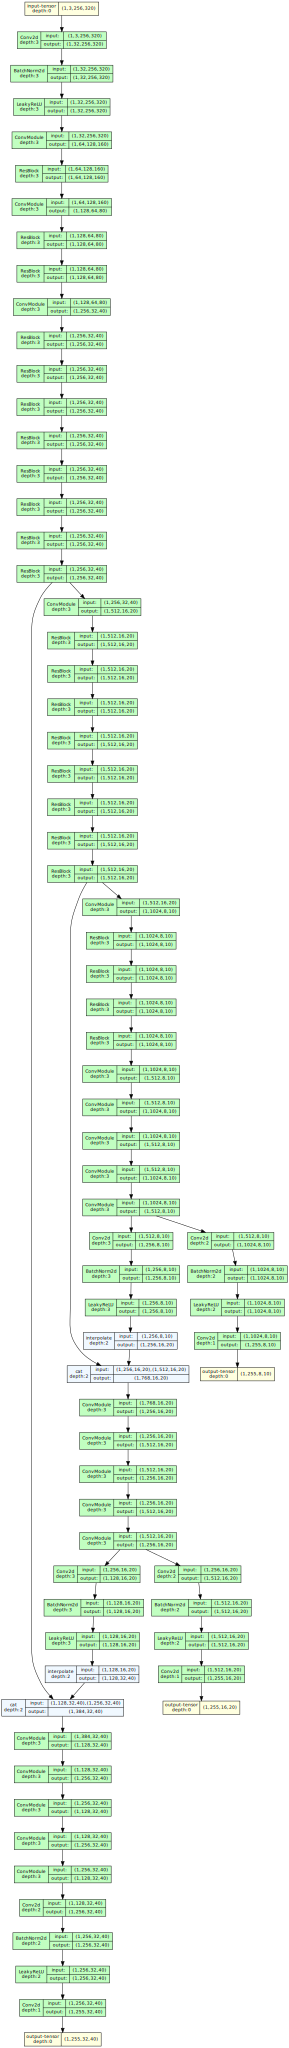

In [4]:

config = '../mmdetection/configs/yolo/yolov3_d53_8xb8-320-273e_coco.py'

cfg = Config.fromfile(config)

dataloader = Runner.build_dataloader(cfg.val_dataloader)

for idx, data_batch in enumerate(dataloader):
    print(idx, data_batch)
    break

model = MODELS.build(cfg.model)
_forward = model.forward

data = model.data_preprocessor(data_batch)
model.forward = partial(_forward, data_samples=data['data_samples'])


summary(model, data['inputs'].shape, depth=3)
# summary(model, (1, 3, 1024, 1024), depth=3)
model_graph = draw_graph(model, input_size=data['inputs'].shape)
model_graph.visual_graph